In [1]:
!pip install gradio==3.50

In [2]:
import gradio as gr

In [3]:
import cv2
import PIL
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf


In [4]:
model = tf.keras.models.load_model('/content/CNN_attention_depth_temporal1.keras')


In [5]:
class_names = ['BENIGN','MALIGNANT']

In [6]:
mapper={'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0}
label_to_class = {
    0: ('BENIGN', 'BENIGN_WITHOUT_CALLBACK'),
    1: 'MALIGNANT',
    # Add more mappings as needed
}

# Function to decode predictions
def decode_predictions(predictions, threshold=0.5):
    decoded_labels = []
    for pred in predictions:
        decoded_labels.append([label_to_class[i] for i, p in enumerate(pred) if p >= threshold])
    return decoded_labels

In [7]:
#def preprocess_image(image_path):
#  # Load image in grayscale
#  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#  # Resize image to match model's input shape
#  img = cv2.resize(img, (50, 50))
#  # Normalize pixel values
#  img = img.astype(np.float32) / 255.0
#  # Convert to RGB color mode
#  img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
#  return img

In [16]:
def predict_image(inp):
  inp = inp.reshape((-1, 50, 50, 3))
  inp = inp.astype(np.float32) / 255.0
  prediction = model.predict(inp).flatten()
  print("The prediction is: ", prediction)
  confidences = {class_names[i]: float(prediction[i]) for i in range(2)}
  return confidences

In [17]:
image = gr.inputs.Image(shape=(50,50))
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

<ipython-input-17-e716dbac79ac>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(50,50))
<ipython-input-17-e716dbac79ac>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(50,50))
<ipython-input-17-e716dbac79ac>:2: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=2)
<ipython-input-17-e716dbac79ac>:2: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=2)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
IMPORTANT: You are using gradio version 3.50.0, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://f7c6a9cee460c27e66.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
The prediction is:  [0.0181891  0.98181087]
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://f7c6a9cee460c27e66.gradio.live


(50, 50, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: [[('BENIGN', 'BENIGN_WITHOUT_CALLBACK')]]


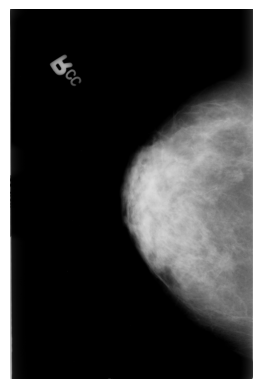

In [ ]:
#image_path = "/content/1-108.jpg"
#img = preprocess_image(image_path)
#print(img.shape)
#pred = model.predict(np.array([img]))
#predictions = decode_predictions(pred)
## Print true and predicted classes)
#print("Predicted Class:", predictions)
## Load and display the image
#image = mpimg.imread(image_path)
#plt.imshow(image, cmap='gray')
#plt.axis('off')
#plt.show()